## IMPORTING NECESSARY LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings =
import warnings
warnings.filterwarnings("ignore")

## LOADING DATA

In [2]:
try:
    df = pd.read_csv('../data/heart.csv')
except FileNotFoundError:
    print("File not found")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset Column Descriptions 
**Exercise** refers to the **physical stress test**, which is a common method used in cardiology to **evaluate how a person's heart responds to exertion**.

| Column Name   | What It Means                                                                 | Values / Categories (if applicable)                                         |
|---------------|--------------------------------------------------------------------------------|----------------------------------------------------------------------------|
| `age`         | Age of the person                                                             | Number (in years)                                                          |
| `sex`         | Whether the person is male or female                                          | 0 = Female, 1 = Male                                                       |
| `cp`          | Type of chest pain experienced                                                | 0 = Typical (common), 1 = Atypical, 2 = Unrelated to heart, 3 = No pain    |
| `trestbps`    | Blood pressure when resting                                                   | Measured in millimeters of mercury (mm Hg)                                                         |
| `chol`        | Cholesterol level in the blood                                                | Measured in milligrams per deciliter (mg/dl)                                                         |
| `fbs`         | Is fasting blood sugar > 120 mg/dl?                                            | 0 = No, 1 = Yes                                                            |
| `restecg`     | Heart’s electrical activity (ECG results)                                     | 0 = Normal, 1 = Slight issues, 2 = Possible heart thickening               |
| `thalach`     | Highest heart rate reached during exercise                                    | Numeric value (e.g., 150 beats per minute)                                                 |
| `exang`       | Did the person have chest pain during exercise?                               | 0 = No, 1 = Yes                                                            |
| `oldpeak`     | Drop in ST level on ECG during exercise (sign of heart stress)                | Decimal number                                                             |
| `slope`       | Shape of the ECG line after exercise                                          | 0 = Upward, 1 = Flat, 2 = Downward                                         |
| `ca`          | Number of major blood vessels seen in X-ray (fluoroscopy)                     | 0 to 3                                                                     |
| `thal`        | Type of blood disorder called thalassemia                                     | 1 = Fixed defect, 2 = Reversible defect, 3 = Normal *(check values)*       |
| `target`      | Does the person have heart disease?                                           | 0 = No, 1 = Yes                                                            |

In [6]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

df['chol'] = df['chol'].astype(float)

In [7]:
## Missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## VISUALIZATION

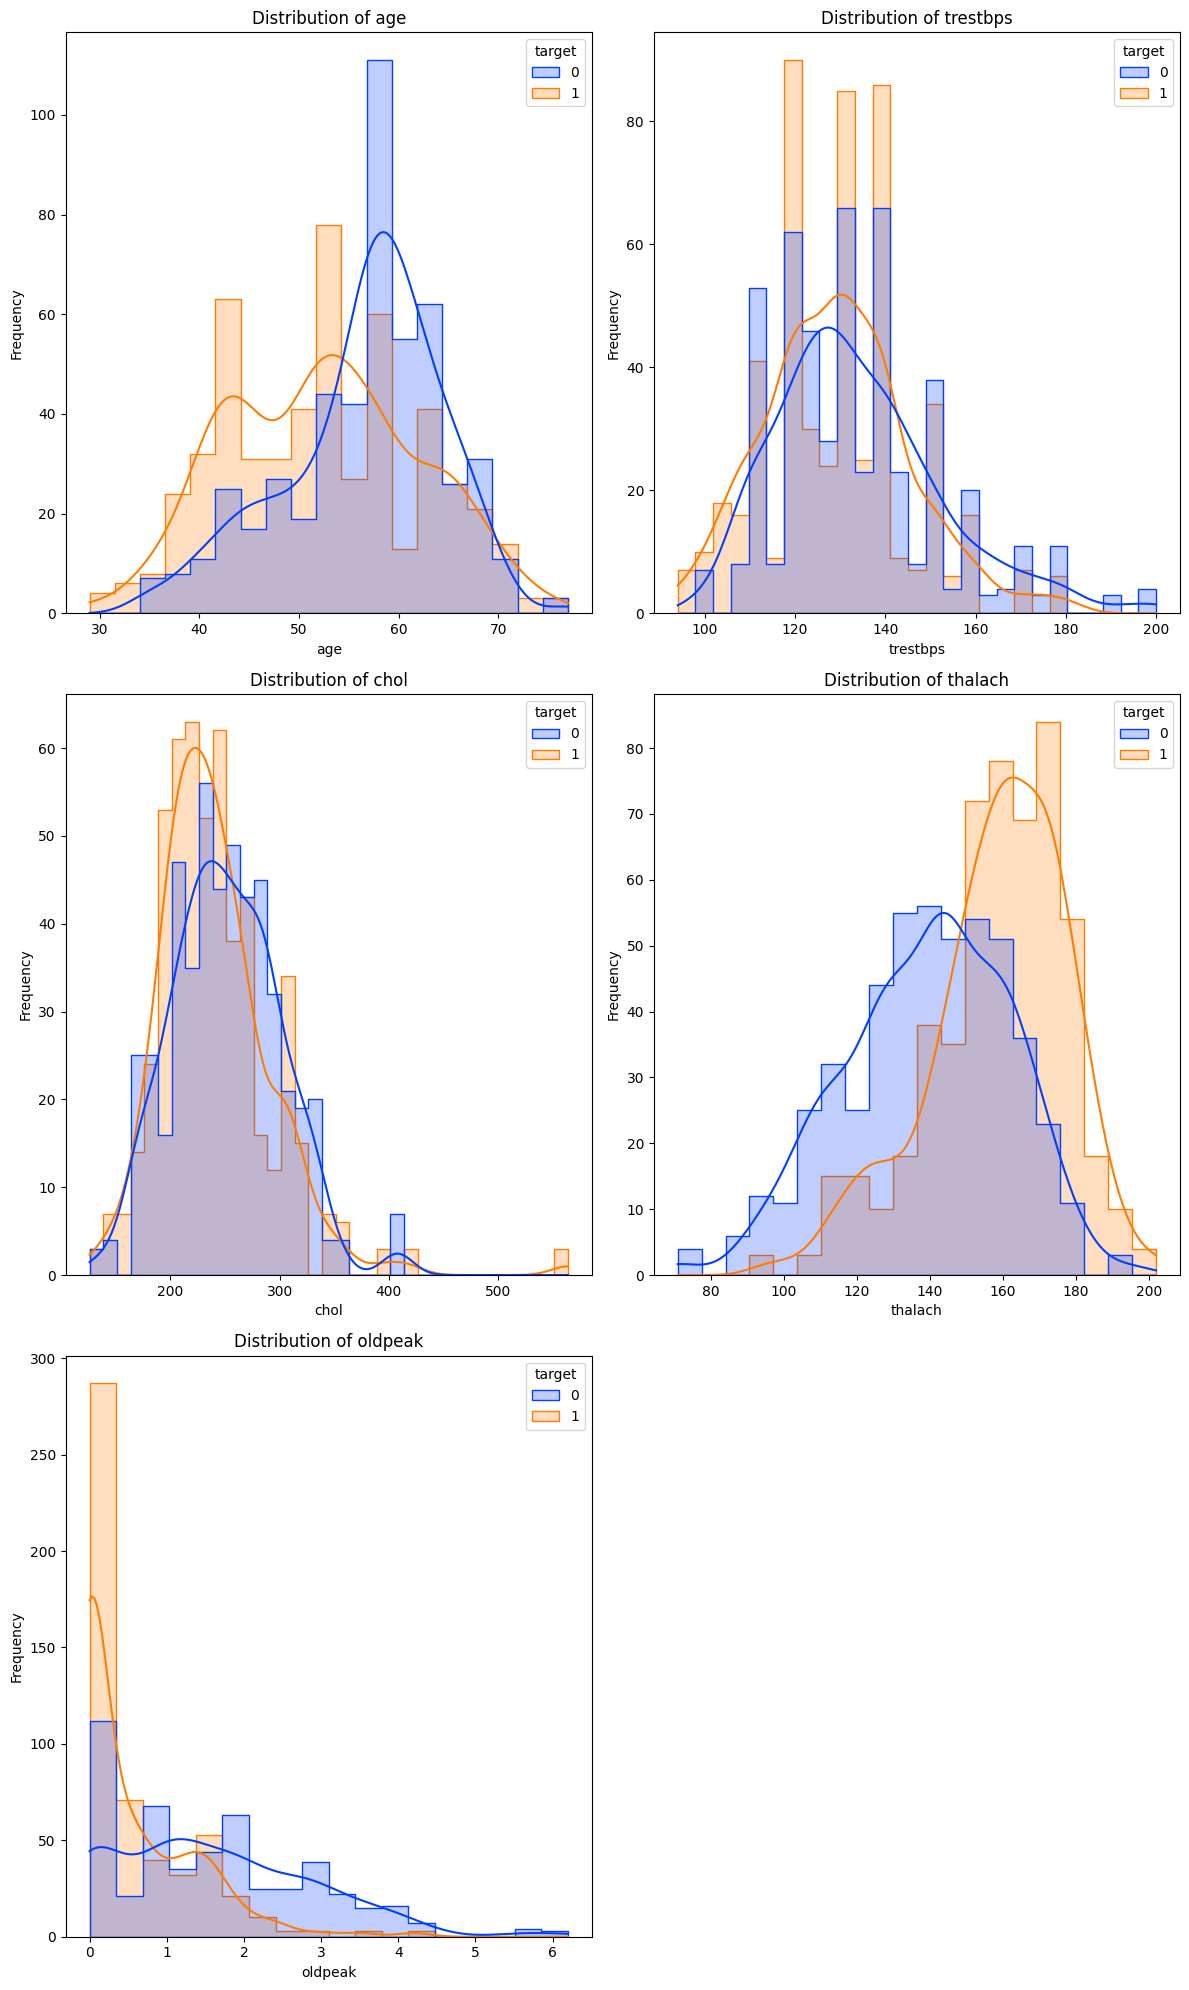

In [8]:
# Select continuous columns
continuous_cols = df.select_dtypes(include=['int64', 'float64'])

# Number of columns per row
cols = 2

# Create subplots
fig, axes = plt.subplots(
    nrows=(len(continuous_cols.columns) // cols) + (len(continuous_cols.columns) % cols > 0),
    ncols=cols,
    figsize=(12, 20)
)

axes = axes.flatten()

# Plot histograms with KDE and hue='target'
for i, col in enumerate(continuous_cols.columns):
    sns.histplot(
        data=df,
        x=col,
        ax=axes[i],
        hue='target',
        kde=True,
        element='step',
        palette='bright'
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Key Insights from the Distribution Graphs 
Age Distribution
1. People with heart disease (Target 1) tend to be more distributed across different age groups, with many in their 40s and 50s.
2. People without heart disease (Target 0) are concentrated mostly in the 55-65 year range.
    
Resting Blood Pressure (Trestbps)
1. Both groups have similar blood pressure distributions in the 120-140 range.
2. People with heart disease tend to have slightly lower resting blood pressure on average.
    
Cholesterol (Chol)
1. People with heart disease have cholesterol levels that peak slightly lower (around 200-220 mg/dL).
2. The distributions largely overlap, suggesting cholesterol alone isn't strongly differentiating between the groups.

Maximum Heart Rate (Thalach)
1. People with heart disease achieve noticeably higher maximum heart rates (160-170 bpm).
2. People without heart disease typically reach lower maximum heart rates (140-150 bpm), which is counter to what might be expected.

ST Depression (Oldpeak)
1. People with heart disease show minimal ST depression during exercise (mostly near 0).
2. People without heart disease show a wider range of ST depression values (0-4+), which is surprising as ST depression typically indicates reduced blood flow to the heart.

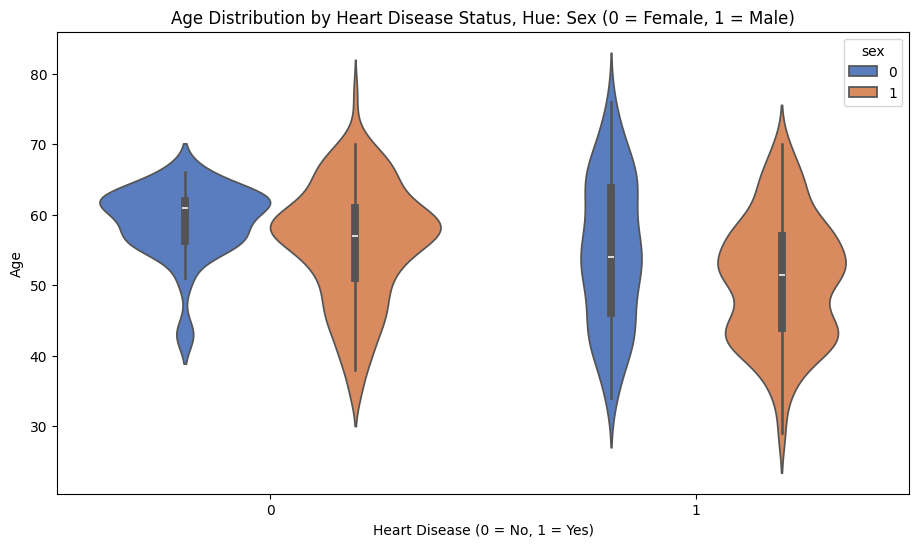

In [9]:
plt.figure(figsize=(11, 6))
sns.violinplot(data=df, x='target', y='age', palette='muted', hue='sex')
plt.title("Age Distribution by Heart Disease Status, Hue: Sex (0 = Female, 1 = Male)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

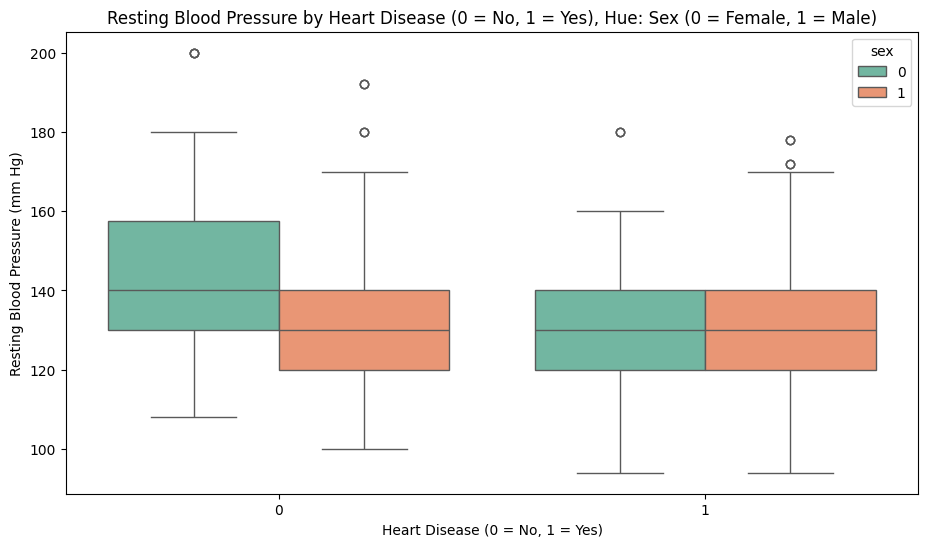

In [10]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=df, x='target', y='trestbps', palette='Set2', hue='sex')
plt.title("Resting Blood Pressure by Heart Disease (0 = No, 1 = Yes), Hue: Sex (0 = Female, 1 = Male)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.show()

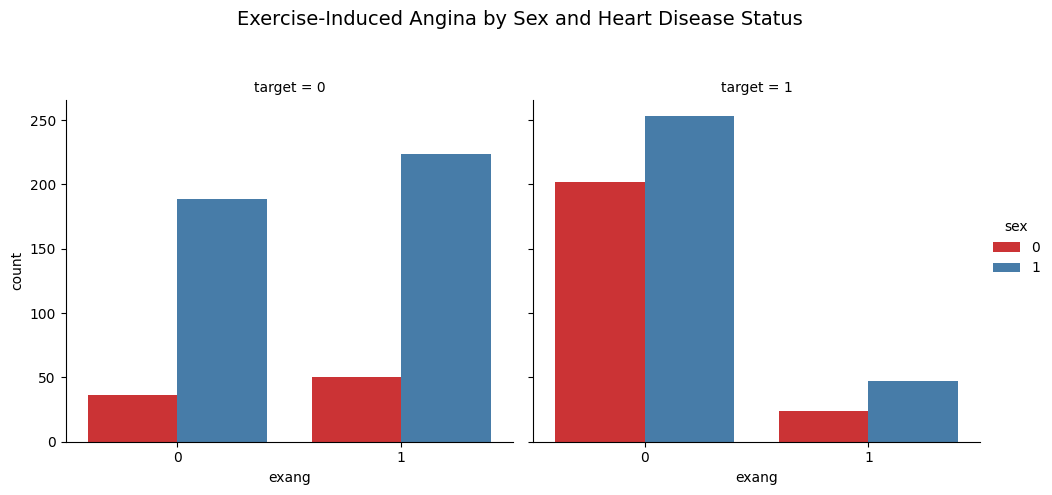

In [11]:
sns.catplot(
    data=df,
    kind='count',
    x='exang',
    hue='sex',
    col='target',
    palette='Set1',
    height=5,
    aspect=1
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Exercise-Induced Angina by Sex and Heart Disease Status", fontsize=14)
plt.show()

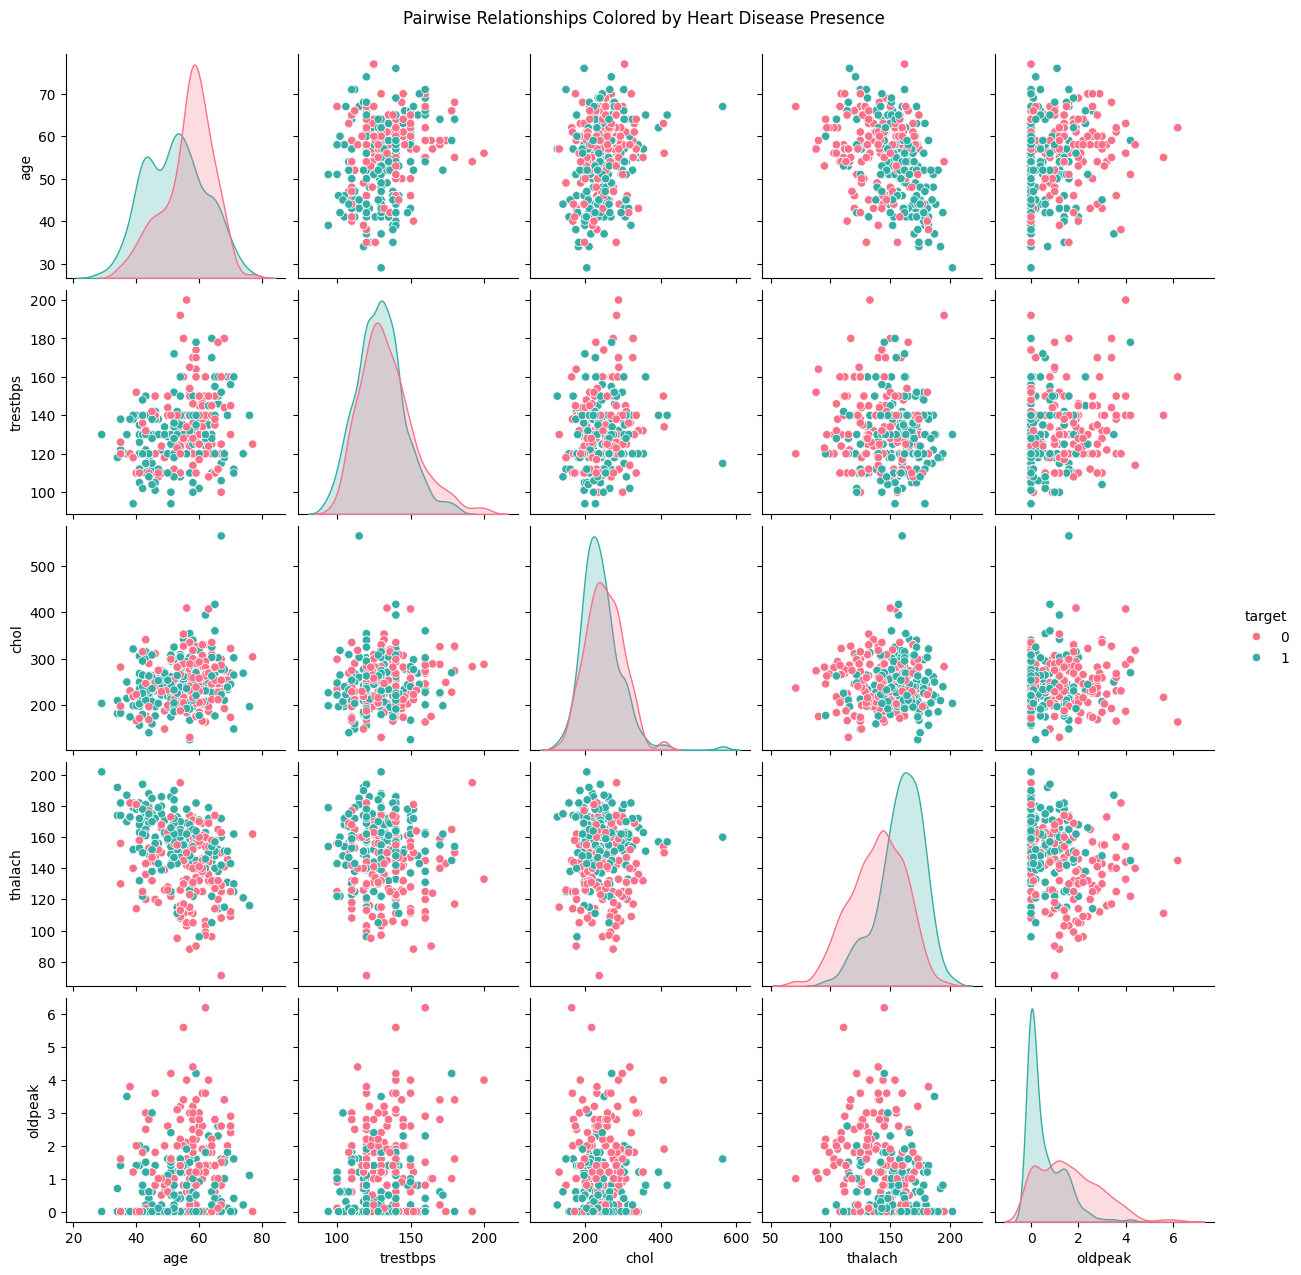

In [12]:
sns.pairplot(df, hue='target', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships Colored by Heart Disease Presence", y=1.02)
plt.show()

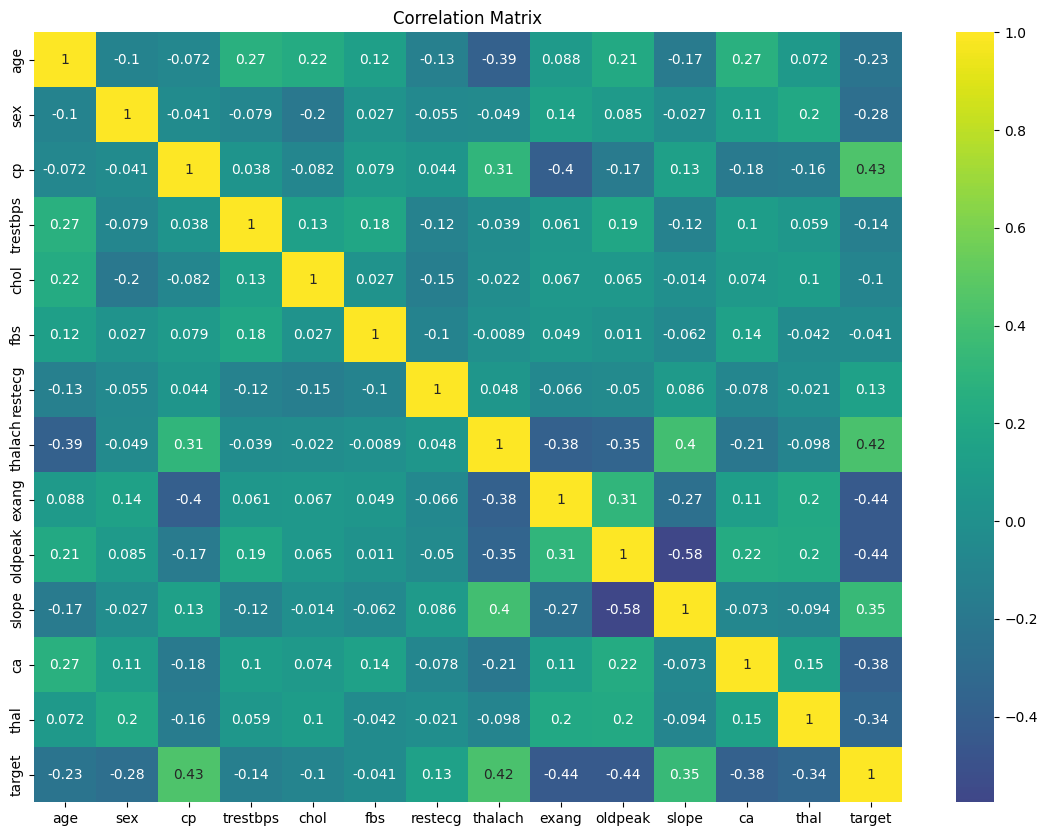

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', center=0)
plt.title("Correlation Matrix")
plt.show()

## INSIGHTS

**Top Positive Correlations with target (presence of heart disease):**
1. Chest Pain Type (cp) = +0.43: Strongest positive correlation.
2. Maximum Heart Rate Achieved (thalach) = +0.42: Higher peak heart rates trend with positive diagnosis.
3. ST Segment Slope (slope) = +0.35: Upsloping segments correlate positively with disease.

**Top Negative Correlations with target:**
1. Oldpeak = –0.44: Greater ST depression during exercise usually indicates ischemia.
2. Exercise-induced Angina (exang) = –0.44: Presence of angina during exertion is negatively correlated with target = 1.
3. Number of Major Vessels Colored by Fluoroscopy (ca) = –0.38: More visible vessels indicate higher risk.
4. Thalassemia (thal) = –0.34: Abnormal thalassemia findings lean toward disease presence.



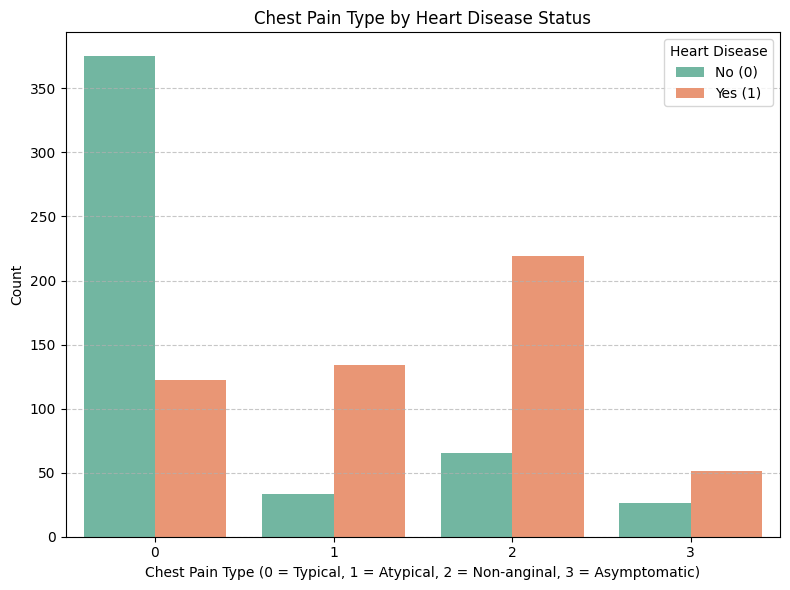

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.title("Chest Pain Type by Heart Disease Status")
plt.xlabel("Chest Pain Type (0 = Typical, 1 = Atypical, 2 = Non-anginal, 3 = Asymptomatic)")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## INSIGHTS
0 – Typical Angina
Patients without heart disease overwhelmingly report typical angina.
This pattern suggests it may not be a strong standalone indicator of heart disease.

1 – Atypical Angina
Atypical angina is more common in patients with heart disease than those without.
It may indicate underlying cardiac issues not conforming to classic symptoms.

2 – Non-anginal Pain
This type is significantly more prevalent in patients with heart disease.
Suggests that even non-classic chest pain should not be dismissed clinically.

3 – Asymptomatic
Even without chest pain, a notable portion of patients have heart disease.
Silent ischemia is a serious concern and supports the need for stress testing.